<a href="https://colab.research.google.com/github/Shritej24c/Credit-Risk/blob/main/final%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing packages using pip

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
|!pip install scipy==1.7

In [ ]:
!pip install dask

### Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
import time as t
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

# fine tuning with Grid Search
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
pd.set_option('display.max_columns', None)

### Reading CSVs

Used data from "American Express - Default Prediction" Kaggle Competition.

The objective of this competition is to predict the probability that a customer does not pay back their credit card balance amount in the future based on their monthly customer profile. The target binary variable is calculated by observing 18 months performance window after the latest credit card statement, and if the customer does not pay due amount in 120 days after their latest statement date it is considered a default event.


In [ ]:
train = pd.read_csv("train_data.csv") # X variables
train.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.004838,NaN,0.

In [ ]:
train.shape

(5531451, 190)

In [ ]:
labels = pd.read_csv("train_labels.csv") # Y variables
labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [ ]:
# Convert Date column to datetime() Data Type
train['S_2'] = pd.to_datetime(train['S_2'])

In [ ]:
# Merge the Features and Labels (Target values)
df = pd.merge(train, labels, on = 'customer_ID', how = 'left')
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.0048

In [ ]:
df.shape #check the shape of the final dataframe

(5531451, 191)

In [ ]:
len(df['customer_ID'].unique())

458913

TOTAL No of CUSTOMERS - 458913

In [ ]:
df.loc[df['customer_ID'] == df.iloc[1,0], :].shape

(13, 191)

In [ ]:
5531451/458913

12.053376130116165

### Randomly Selecting 1 month of data for each customer




In [ ]:
df12 = df.sample(frac=1, random_state = 21)  #shuffling the data

#Grouping by the customer ID and selecting the first row
df1 = df12.groupby('customer_ID',as_index=False).first()

#checking the Minimum and Maximum Date for the data
print("Min :", df1['S_2'].min(), "Max: ", df1['S_2'].max())
df1.shape

Min : 2017-03-01 00:00:00 Max:  2018-03-31 00:00:00


(458913, 191)

In [ ]:
# Grouping by the Month and counting the rows in each of them
df1.set_index('S_2').groupby(pd.Grouper(freq = 'M')).count()

,customer_ID,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
S_2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-31,30730,30600,30730,30730,30730,30730,26787,30730,30730,4606,24965,29565,30730,30730,30730,30730,26658,30730,28845,3931,30730,30730,30715,14705,30730,30730,30730,30676,30599,30730,10143,30730,30730,30730,30730,30730,26787,30730,30730,30674,17489,30730,30730,30730,20853,30730,30680,30730,29206,30687,30730,28822,30730,30724,30730,30730,17104,30730,30730,4156,30730,30724,30730,30730,30730,30730,30724,30730,30639,30730,30676,30730,30730,325,30730,30641,30730,4108,30730,30730,24320,30687,30730,29565,30631,30730,2442,30730,30641,30730,30730,30730,30694,9038,30730,30730,30730,30730,30724,30730,30730,30676,30730,2655,30730,30730,30730,59,30730,30730,170,30730,30730,30730,30730,30730,30730,30730,30730,30676,30730,30730,30695,30730,30730,30730,30730,30730,30730,30729,30730,30729,30726,30730,30730,30631,30631,15821,3925,30631,30730,30730,3268,30329,30730,1383,30730,344,344,345,30730,30730,26216,30730,30730,30730,30730,30730,30730,30730,30730,30730,30730,30730,30730,30730,30730,30730,30631,30631,30730,482,30631,30631,3931,30730,30730,2270,2270,2270,2270,2270,30631,30730,30631,5477,30631,30730,30631,30730
2017-04-30,31233,31097,31233,31233,31233,31233,27205,31233,31233,4907,25305,30024,31233,31233,31233,31233,26900,31233,29248,3970,31233,31233,31216,14866,31233,31233,31233,31175,31106,31233,10274,31233,31233,31233,31233,31233,27205,31233,31233,31167,17580,31233,31233,31233,21162,31233,31176,31233,29613,31186,31233,29154,31233,31226,31233,31233,17203,31233,31233,4159,31233,31226,31233,31233,31233,31233,31226,31233,31141,31233,31175,31233,31233,362,31233,31142,31233,4087,31233,31233,24690,31186,31233,30024,31126,31233,2494,31233,31142,31233,31233,31233,31199,9012,31233,31233,31233,31233,31226,31233,31233,31175,31233,2667,31233,31233,31233,62,31233,31233,154,31233,31233,31233,31233,31233,31233,31233,31233,31175,31233,31233,31191,31233,31233,31233,31233,31233,31233,31232,31233,31232,31233,31233,31233,31126,31126,16191,3964,31126,31233,31233,3281,30830,31233,1457,31233,299,299,300,31233,31233,26683,31233,31233,31233,31233,31233,31233,31233,31233,31233,31233,31233,31233,31233,31233,31233,31126,31126,31233,479,31126,31126,3970,31233,31233,2253,2253,2253,2253,2253,31126,31233,31126,5593,31126,31233,31126,31233
2017-05-31,31048,30901,31048,31048,31048,31048,27106,31048,31048,5182,25095,29842,31048,31048,31048,31048,26824,31048,29086,4030,31048,31048,31029,14811,31048,31048,31048,30987,30909,31048,10327,31048,31048,31048,31048,31048,27106,31048,31048,30976,17402,31048,31048,31048,21161,31048,30982,31048,29472,30988,31048,29031,31048,31048,31048,31048,17198,31048,31048,4171,31048,31048,31048,31048,31048,31048,31048,31048,30951,31048,30987,31048,31048,374,31048,30952,31048,4071,31048,31048,24521,30988,31048,29842,30934,31048,2563,31048,30952,31048,31048,31048,31009,8944,31048,31048,31048,31048,

In [ ]:
# Checking Null Values in each columns
# Target column shouldn't have any null value
df1.isnull().sum()

customer_ID         0
S_2                 0
P_2              2434
D_39                0
B_1                 0
                ...  
D_142          373333
D_143            2532
D_144               0
D_145            2532
target              0
Length: 191, dtype: int64

Checking for Categorical Variables

In [ ]:
# Run the loop through each column and check it's datatype
# If Data Type not equal to Float64, then print

for i in df1.columns:
    if df1[i].dtypes != 'float64':
        print(i, df1[i].dtypes)

customer_ID object
S_2 datetime64[ns]
D_63 object
D_64 object
B_31 int64
target int64


In [ ]:
# Check unique values in D_63 column
df1['D_63'].unique()

array(['CR', 'CO', 'CL', 'XZ', 'XM', 'XL'], dtype=object)

In [ ]:
# Check unique values in D_64 column
df1['D_64'].unique()

array(['O', 'R', 'U', '-1', None], dtype=object)

#### Converting Categorical Variables to dummy variables

In [ ]:
print("Min: ", df1['S_2'].min(), "Max: ", df1['S_2'].max())

Min:  2017-03-01 00:00:00 Max:  2018-03-31 00:00:00


In [ ]:
# fn converts categorical values to dummy values and drops the og columns
df_new1 = pd.get_dummies(df1, columns = ['D_63', 'D_64'], drop_first = True)

In [ ]:
df_new1.shape

(458913, 197)

In [ ]:
# Save the final dataframe in csv
df_new1.to_csv('final_df.csv', index = False)

In [ ]:
df_new = pd.read_csv('final_df.csv', index_col = False)
df_new.shape

(183720, 197)

In [ ]:
df1.set_index('S_2').groupby(pd.Grouper(freq = 'M')).count()

In [ ]:
for i in df_new.columns:
    print(i)

customer_ID
S_2
P_2
D_39
B_1
B_2
R_1
S_3
D_41
B_3
D_42
D_43
D_44
B_4
D_45
B_5
R_2
D_46
D_47
D_48
D_49
B_6
B_7
B_8
D_50
D_51
B_9
R_3
D_52
P_3
B_10
D_53
S_5
B_11
S_6
D_54
R_4
S_7
B_12
S_8
D_55
D_56
B_13
R_5
D_58
S_9
B_14
D_59
D_60
D_61
B_15
S_11
D_62
D_65
B_16
B_17
B_18
B_19
D_66
B_20
D_68
S_12
R_6
S_13
B_21
D_69
B_22
D_70
D_71
D_72
S_15
B_23
D_73
P_4
D_74
D_75
D_76
B_24
R_7
D_77
B_25
B_26
D_78
D_79
R_8
R_9
S_16
D_80
R_10
R_11
B_27
D_81
D_82
S_17
R_12
B_28
R_13
D_83
R_14
R_15
D_84
R_16
B_29
B_30
S_18
D_86
D_87
R_17
R_18
D_88
B_31
S_19
R_19
B_32
S_20
R_20
R_21
B_33
D_89
R_22
R_23
D_91
D_92
D_93
D_94
R_24
R_25
D_96
S_22
S_23
S_24
S_25
S_26
D_102
D_103
D_104
D_105
D_106
D_107
B_36
B_37
R_26
R_27
B_38
D_108
D_109
D_110
D_111
B_39
D_112
B_40
S_27
D_113
D_114
D_115
D_116
D_117
D_118
D_119
D_120
D_121
D_122
D_123
D_124
D_125
D_126
D_127
D_128
D_129
B_41
B_42
D_130
D_131
D_132
D_133
R_28
D_134
D_135
D_136
D_137
D_138
D_139
D_140
D_141
D_142
D_143
D_144
D_145
target
D_63_CO
D_63_CR
D_63_XL
D_63_X

### Split Dataset in Train, Test1 & Test2

In [ ]:
train_df = df_new.loc[(df_new['S_2'] >= '2017-05') & (df_new['S_2'] <= '2018-01'), :]
test1_df = df_new.loc[(df_new['S_2'] <= '2017-04') , :]
test2_df = df_new.loc[ (df_new['S_2'] >= '2018-02'), :]

In [ ]:
train_df.shape

(269243, 197)

In [ ]:
xtrain = train_df.drop(columns = ['target', 'customer_ID', 'S_2'])
ytrain = train_df['target']

In [ ]:
xtrain.shape

(269243, 194)

### Feature Selection by extracting feature importance from 2 models

In [ ]:
### MODEL 1
t1 = t.time()
m1 = xgb.XGBClassifier(random_state = 21)
m1.fit(xtrain, ytrain)
feat_imp = pd.DataFrame({'columns': xtrain.columns, 'feat_imp': m1.feature_importances_}) # creating table to rank feature importances
feat_imp.loc[feat_imp['feat_imp'] > 0.005,:].sort_values(['feat_imp'], ascending = False)
feat_imp.to_csv('feat_imp.csv')
t2 = t.time()
print(t2-t1)

218.29219317436218


In [ ]:
# MODEL 2 - with some parameters as defined by professor
t1 = t.time() #max_dept = max number of nodes, subsample = % of rows considered from the total data in the main tree at once, colsample_bytree = % of columns considered from the total data in the main tree at once
m2 = xgb.XGBClassifier(n_estimators = 300, learning_rate = 0.5,
                       max_depth = 4, subsample = .5, colsample_bytree = 0.5, scale_pos_weight = 5, random_state =21 )
m2.fit(xtrain, ytrain)
feat_imp1 = pd.DataFrame({'columns': xtrain.columns, 'feat_imp': m2.feature_importances_})
feat_imp1.loc[feat_imp1['feat_imp'] > 0.005,:].sort_values(['feat_imp'], ascending = False)
feat_imp1.to_csv('feat_imp1.csv')
t2 = t.time()
print(t2-t1)

146.99498295783997


In [ ]:
#the total time taken to run the code
start = t.time()
df_rnd1 = train.loc[(train['S_2'].dt.year == 2017) & (train['S_2'].dt.month == 7), :]
print(df_rnd1.shape)
end = t.time()
print(end - start)

(415602, 190)
31.137080669403076


In [ ]:
#segregated the features based on their feature importance > 0.005 for model imp1
feat_imp1.loc[feat_imp1['feat_imp'] > 0.005, 'columns'].reset_index()

,index,columns
0,0,P_2
1,2,B_1
2,3,B_2
3,4,R_1
4,5,S_3
5,6,D_41
6,7,B_3
7,8,D_42
8,9,D_43
9,10,D_44


In [ ]:
#segregated the features based on their feature importance > 0.005 for model imp1
feat_imp.loc[feat_imp1['feat_imp'] > 0.005, 'columns'].reset_index()

,index,columns
0,0,P_2
1,2,B_1
2,3,B_2
3,4,R_1
4,5,S_3
5,6,D_41
6,7,B_3
7,8,D_42
8,9,D_43
9,10,D_44


### Final Sets of features to be used for modelling

In [ ]:
#union the above two chunk's output based on the filter by ignoring values that occur twice. Eg : A B C A D E - here we consider 5 values
col = list(set(feat_imp1.loc[feat_imp1['feat_imp'] > 0.005, 'columns'].to_list()).union(set(feat_imp.loc[feat_imp['feat_imp'] > 0.005, 'columns'].to_list())))
print(col)

['D_50', 'R_27', 'S_3', 'B_17', 'B_39', 'D_48', 'D_77', 'D_75', 'D_53', 'D_132', 'B_1', 'B_3', 'D_44', 'B_2', 'D_42', 'B_9', 'D_49', 'D_111', 'D_45', 'D_88', 'B_5', 'D_66', 'B_38', 'S_23', 'D_43', 'D_63_CO', 'D_41', 'D_51', 'P_2', 'B_7', 'R_26', 'D_74', 'D_62', 'B_4', 'D_56', 'B_10', 'B_8', 'D_46', 'D_76', 'D_110', 'P_3', 'D_64_O', 'S_7', 'R_1']


In [ ]:
len(col)

44

In [ ]:
df = df_new.loc[:, col]
df.shape

(458913, 44)

In [ ]:
train_df.shape


(269243, 197)

In [ ]:
#Refer section "Split Dataset in Train, Test1 & Test2".
#train_df contains 197 columns within the range of dates assigned to it. Now, after we assign the [col] to it, we are only choosing the columns that are in the col variable i.e. there are 44
xtrain = train_df[col]
xtest1 = test1_df[col]
xtest2 = test2_df[col]

In [ ]:
#refer the same train_df variable output
ytrain = train_df['target']
ytest1 = test1_df['target']
ytest2 = test2_df['target']

In [ ]:
#saving it to csv
xtrain.to_csv('xtrain.csv', index = False)
xtest1.to_csv('xtest1.csv', index = False)
xtest2.to_csv('xtest2.csv', index = False)
ytest1.to_csv('ytest1.csv', index = False)
ytest2.to_csv('ytest2.csv', index = False)
ytrain.to_csv('ytrain.csv', index = False)

In [ ]:
test2_df.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_145', 'target', 'D_63_CO', 'D_63_CR', 'D_63_XL', 'D_63_XM',
       'D_63_XZ', 'D_64_O', 'D_64_R', 'D_64_U'],
      dtype='object', length=197)

In [ ]:
xtrain.shape

(269243, 44)

In [ ]:
ytrain.shape

(269243,)

## XGBoost

### Grid Search for XGBoost model

Combinations:
1. Number of Trees: [50, 100, 300]
2. Learning Rates = [0.01, .1]
3. % of obs used in each tree = [.5, .8]
4. % of features used in each tree = [.5, 1]
5. Weight of default obs = [1, 5, 10]

In [ ]:
t1 = t.time()
grid_search = pd.DataFrame(columns = ['No. of Trees', 'LR', 'Subsample', '%features', 'Default Weight', 'AUC Train', 'AUC Test1', 'AUC Test2'])
num_trees = [50, 100, 300]
lr = [0.01, .1]
subsample = [.5, .8]
feat = [.5, 1]
def_w = [1, 5, 10]

row = 0
for i in num_trees:
    for j in lr:
        for k in subsample:
            for f in feat:
                for d in def_w:
                    xgb_inst = xgb.XGBClassifier(n_estimators = i, learning_rate = j, subsample = k, colsample_bytree = f, scale_pos_weight = d, random_state = 21)
                    model = xgb_inst.fit(xtrain, ytrain)
                    print(row)
                    grid_search.loc[row, 'No. of Trees'] = i
                    grid_search.loc[row, 'LR'] = j
                    grid_search.loc[row, 'Subsample'] = k
                    grid_search.loc[row, '%features'] = f
                    grid_search.loc[row, 'Default Weight'] = d
                    grid_search.loc[row,"AUC Train"] = roc_auc_score(ytrain, model.predict_proba(xtrain)[:,1])
                    grid_search.loc[row,"AUC Test1"] = roc_auc_score(ytest1, model.predict_proba(xtest1)[:,1])
                    grid_search.loc[row,"AUC Test2"] = roc_auc_score(ytest2, model.predict_proba(xtest2)[:,1])
                    row += 1

t2 = t.time()
print(t2-t1)
grid_search


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
5724.6286079883575


,No. of Trees,LR,Subsample,%features,Default Weight,AUC Train,AUC Test1,AUC Test2
0,50,0.01,0.5,0.5,1,0.930578,0.918653,0.93205
1,50,0.01,0.5,0.5,5,0.928086,0.91662,0.928584
2,50,0.01,0.5,0.5,10,0.926039,0.914617,0.925916
3,50,0.01,0.5,1,1,0.925662,0.912498,0.929065
4,50,0.01,0.5,1,5,0.92363,0.911914,0.9262
...,...,...,...,...,...,...,...,...
67,500,0.1,0.8,0.5,5,0.961602,0.930949,0.941255
68,500,0.1,0.8,0.5,10,0.960659,0.929978,0.940514
69,500,0.1,0.8,1,1,0.96475,0.93116,0.942132
70,500,0.1,0.8,1,5,0.963798,0.930387,0.941157


In [ ]:
grid_search.to_csv("grid_search.csv", index = False)

In [ ]:
grid_search.loc[0, '%features']

0.5

In [ ]:
grid_search.iloc[0, -3]

0.9305782740137187

In [ ]:
grid_search.shape

(72, 8)

### Final XGB MODEL

In [ ]:
xgb_inst = xgb.XGBClassifier(n_estimators = 300, learning_rate = 0.1, subsample = 0.8, colsample_bytree = 1, scale_pos_weight = 1, random_state = 21)
final_xgb = xgb_inst.fit(xtrain, ytrain)
final_xgb.save_model("final_xgb.json")

In [ ]:
roc_auc_score(ytrain, final_xgb.predict_proba(xtrain)[:,1])

0.9584672254547199

## Neural Network

In [ ]:
xtest1 = pd.read_csv('xtest1.csv', index_col = False)
xtest2 = pd.read_csv('xtest2.csv', index_col = False)
ytest1 = pd.read_csv('ytest1.csv', index_col = False)
ytest2 = pd.read_csv('ytest2.csv', index_col = False)
ytrain = pd.read_csv('ytrain.csv', index_col = False)
xtrain = pd.read_csv('xtrain.csv', index_col = False)

In [ ]:
print(xtest1.shape, xtest2.shape)

(61963, 46) (88750, 46)


### Outlier Treatment

In [ ]:
xtrain.describe(percentiles = [.01, .99]).T

,count,mean,std,min,1%,50%,99%,max
D_132,41679.0,0.185275,0.265836,-1.454371e-02,0.001291,0.121890,1.053642,5.934922
P_3,302831.0,0.598577,0.173675,-1.165741e+00,0.000127,0.617261,1.007184,2.100572
D_44,296782.0,0.117314,0.218479,4.728746e-08,0.000153,0.007684,1.004810,5.634724
D_64_O,308200.0,0.534137,0.498834,0.000000e+00,0.000000,1.000000,1.000000,1.000000
D_52,307727.0,0.176831,0.173926,-7.016962e-03,0.003918,0.140216,1.005973,1.009999
P_2,306994.0,0.650984,0.242253,-3.842365e-01,0.020771,0.682384,1.005636,1.009999
D_56,166170.0,0.196983,0.216196,-1.698373e-02,0.002303,0.142647,0.993570,10.956514
B_23,308200.0,0.171912,0.229551,2.531639e-07,0.001415,0.061454,1.019665,1.471304
D_88,1669.0,0.188527,0.238895,3.874467e-04,0.002545,0.097316,1.077990,2.669250
R_1,308200.0,0.078054,0.223272,1.917514e-08,0.000114,0.005787,1.008829,2.758340


In [ ]:
xtrain.quantile(0.99)

D_132     1.053642
P_3       1.007184
D_44      1.004810
D_64_O    1.000000
D_52      1.005973
P_2       1.005636
D_56      0.993570
B_23      1.019665
D_88      1.077990
R_1       1.008829
D_76      0.957633
D_110     1.009673
D_77      0.998713
D_62      0.990181
B_11      1.003614
B_2       1.009678
D_51      1.006524
D_108     1.008881
S_3       1.011838
D_50      1.027824
R_3       1.006301
B_3       0.995186
D_49      0.966067
D_66      1.000000
B_38      7.000000
D_75      1.003377
D_53      0.946242
B_1       1.005669
B_4       0.987586
D_111     1.009883
D_134     1.008763
D_41      0.901434
B_17      1.009729
D_46      0.993105
B_5       0.996049
D_43      1.011034
S_23      0.985121
B_9       1.007330
D_48      1.000338
R_27      1.009884
B_18      1.009723
D_112     1.009885
D_47      1.002942
D_45      1.002119
D_42      0.997904
S_24      1.006088
Name: 0.99, dtype: float64

In [ ]:
for i in xtrain.columns:
    xtrain[i] = np.where(xtrain[i] > xtrain[i].quantile(0.99), xtrain[i].quantile(0.99), xtrain[i] )
    xtrain[i] = np.where(xtrain[i] < xtrain[i].quantile(0.01), xtrain[i].quantile(0.01), xtrain[i] )

for i in xtest1.columns:
    xtest1[i] = np.where(xtest1[i] > xtest1[i].quantile(0.99), xtest1[i].quantile(0.99), xtest1[i] )
    xtest1[i] = np.where(xtest1[i] < xtest1[i].quantile(0.01), xtest1[i].quantile(0.01), xtest1[i] )

for i in xtest2.columns:
    xtest2[i] = np.where(xtest2[i] > xtest2[i].quantile(0.99), xtest2[i].quantile(0.99), xtest2[i] )
    xtest2[i] = np.where(xtest2[i] < xtest2[i].quantile(0.01), xtest2[i].quantile(0.01), xtest2[i] )


In [ ]:
xtrain.describe(percentiles = [.01, .99]).T

,count,mean,std,min,1%,50%,99%,max
D_132,41679.0,0.174952,0.178497,0.001291,0.001295,0.121890,1.053607,1.053642
P_3,302831.0,0.599173,0.161003,0.000127,0.000132,0.617261,1.007183,1.007184
D_44,296782.0,0.114555,0.202797,0.000153,0.000153,0.007684,1.004808,1.004810
D_64_O,308200.0,0.534137,0.498834,0.000000,0.000000,1.000000,1.000000,1.000000
D_52,307727.0,0.176842,0.173802,0.003918,0.003918,0.140216,1.005973,1.005973
P_2,306994.0,0.651830,0.239698,0.020771,0.020772,0.682384,1.005636,1.005636
D_56,166170.0,0.192139,0.172434,0.002303,0.002305,0.142647,0.993395,0.993570
B_23,308200.0,0.170646,0.224239,0.001415,0.001415,0.061454,1.019663,1.019665
D_88,1669.0,0.185404,0.221173,0.002545,0.002568,0.097316,1.073307,1.077990
R_1,308200.0,0.074105,0.200294,0.000114,0.000114,0.005787,1.008829,1.008829


### Normalisation

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
sc = StandardScaler()
sc.fit(xtrain)

xtrain_n = sc.transform(xtrain)
xtest1_n  = sc.transform(xtest1)
xtest2_n  = sc.transform(xtest2)


In [ ]:
# convert to Pandas DF
xtrain_n_df = pd.DataFrame(xtrain_n, columns=xtrain.columns)
xtest1_n_df = pd.DataFrame(xtest1_n, columns=xtest1.columns)
xtest2_n_df = pd.DataFrame(xtest2_n, columns=xtest2.columns)

### Missing Value Imputation

In [ ]:
xtrain_n_df.fillna(0,inplace=True)
xtest1_n_df.fillna(0,inplace=True)
xtest2_n_df.fillna(0,inplace=True)

In [ ]:
xtest2_n_df.head()

,D_132,P_3,D_44,D_64_O,D_52,P_2,D_56,B_23,D_88,R_1,D_76,D_110,D_77,D_62,B_11,B_2,D_51,D_108,S_3,D_50,R_3,B_3,D_49,D_66,B_38,D_75,D_53,B_1,B_4,D_111,D_134,D_41,B_17,D_46,B_5,D_43,S_23,B_9,D_48,R_27,B_18,D_112,D_47,D_45,D_42,S_24
0,0.000000,-0.505148,-0.564091,0.933905,0.358555,0.947136,2.920451,-0.694351,0.0,-0.333794,0.0,0.0,0.048903,0.262786,-0.475435,0.959446,0.875116,0.0,-0.387733,0.000000,-0.083940,-0.522808,0.00000,0.000000,-0.426996,-0.755990,0.000000,-0.435203,-0.711658,0.0,0.0,-0.293842,0.000000,-0.045829,-0.389507,-0.487600,-0.221660,-0.691054,-1.113236,0.379178,1.111277,0.419485,-0.002393,0.095342,0.000000,0.698110
1,0.000000,0.521008,-0.564091,0.933905,0.121394,-0.118643,2.000253,-0.745614,0.0,-0.351168,0.0,0.0,0.920463,1.200622,-0.526262,0.970053,-0.569646,0.0,0.491577,1.839853,-0.650626,-0.540158,0.00000,0.000000,-0.426996,-0.784916,-0.422515,-0.533221,-0.772272,0.0,0.0,-0.280421,0.011992,-0.380362,0.306950,-0.531793,-0.230284,-0.602067,-1.104109,0.373707,1.126438,0.437530,0.046392,-0.698914,0.000000,0.541320
2,0.000000,-0.794737,3.773878,0.933905,-0.165032,-1.039215,-0.314786,3.575013,0.0,2.138164,0.0,0.0,-0.942008,-0.808191,-0.357369,0.472744,0.868636,0.0,-0.278217,-0.437429,-0.632134,-0.534053,0.00000,0.000000,-1.059895,1.448600,0.760980,-0.327681,2.176944,0.0,0.0,-0.296373,0.000000,2.339308,-0.391479,-0.284280,-0.268807,0.537477,1.825103,-2.716296,-0.334444,0.421733,-0.245679,-0.697024,0.000000,0.508702
3,0.871773,0.000000,0.000000,-1.070772,-0.829931,-1.657535,0.000000,-0.508011,0.0,4.642663,0.0,0.0,-1.008877,0.000000,-0.223174,0.964853,-0.596078,0.0,-0.372045,0.000000,0.398404,-0.517511,-0.95754,0.000000,-1.059895,-0.761658,0.640869,-0.124539,-0.748501,0.0,0.0,-0.282957,0.000000,0.000000,-0.425116,0.000000,-0.245618,-0.179755,0.000000,0.000000,1.109746,0.433858,-1.051692,-0.958438,-0.633055,0.513815
4,0.000000,0.822507,-0.534399,0.933905,0.114312,1.013611,3.797131,-0.615847,0.0,-0.323647,0.0,0.0,0.899202,1.156361,0.081236,-0.075026,0.857788,0.0,-0.690139,-0.483243,-0.649638,1.161940,0.00000,0.346521,0.205904,-0.471895,0.000000,0.197508,-0.480377,0.0,0.0,-0.295804,-1.485258,-1.259995,-0.426005,0.067839,-0.253387,-0.623887,0.598802,0.374317,0.248417,0.442394,-0.122736,-0.466182,0.000000,0.589840


In [ ]:
def build_classifier(activation = 'relu', dropout_rate = .5, neurons = 4):
    # first step: create a Sequential object, as a sequence of layers. B/C NN is a sequence of layers.
    classifier = Sequential()
    # add the first hidden layer
    classifier.add(Dense(units=neurons,kernel_initializer='glorot_uniform',
                    activation = activation))
    classifier.add(Dropout(dropout_rate))
    # add the second hidden layer
    classifier.add(Dense(units=neurons,kernel_initializer='glorot_uniform',
                    activation = activation))
    # add the output layer
    classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',
                    activation = 'sigmoid'))
    # compiling the NN
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return classifier


classifier = KerasClassifier(build_fn=build_classifier, batch_size = 100)

parameters = dict(activation = ['relu', 'tanh'], batch_size = [100, 10000], )
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'roc_auc', cv=10, return_train_score=True)
grid_search = grid_search.fit(xtrain_n_df, ytrain)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_




<ipython-input-82-62d358e82ec6>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn=build_classifier, batch_size = 100)


4422/7573 [================>.............] - ETA: 5s

KeyboardInterrupt: ignored

In [ ]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.924460 (0.003092) with: {'activation': 'relu', 'batch_size': 100}
0.617315 (0.122796) with: {'activation': 'relu', 'batch_size': 10000}
0.925803 (0.001744) with: {'activation': 'tanh', 'batch_size': 100}
0.655991 (0.130437) with: {'activation': 'tanh', 'batch_size': 10000}


In [ ]:
grid_search.

0

In [ ]:
best_parameters

{'activation': 'tanh'}

In [ ]:
train_pred = grid_search.predict_proba(xtrain_n_df)


8414/8414 [==============================] - 43s 5ms/step


In [ ]:
ytrain.sum()

target    69028
dtype: int64

In [ ]:
train_pred

array([[0.9736629 , 0.02633711],
       [0.970219  , 0.02978096],
       [0.96727234, 0.03272764],
       ...,
       [0.49549836, 0.50450164],
       [0.97080064, 0.02919936],
       [0.9729349 , 0.02706511]], dtype=float32)

In [ ]:
roc_auc_score(ytrain, train_pred[:, 1])

0.9261858132078623

In [ ]:
test1_pred = grid_search.predict_proba(xtest1_n_df)[:,1]
test2_pred = grid_search.predict_proba(xtest2_n_df)[:,1]

2774/2774 [==============================] - 5s 2ms/step


In [ ]:
print(roc_auc_score(ytest1, test1_pred))
print(roc_auc_score(ytest2, test2_pred))

0.9182272163901571
0.938807971658403


In [ ]:
best_accuracy

0.9282850734081782

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([24.16289396, 25.82018354]),
 'std_fit_time': array([6.02319552, 8.24766352]),
 'mean_score_time': array([2.45665553, 2.47038836]),
 'std_score_time': array([0.43214532, 0.3582605 ]),
 'param_activation': masked_array(data=['relu', 'tanh'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'activation': 'relu'}, {'activation': 'tanh'}],
 'split0_test_score': array([0.92658136, 0.92623104]),
 'split1_test_score': array([0.92750921, 0.92654195]),
 'split2_test_score': array([0.92688978, 0.92681698]),
 'split3_test_score': array([0.92984503, 0.92995832]),
 'split4_test_score': array([0.93020029, 0.93007415]),
 'split5_test_score': array([0.92676152, 0.92762218]),
 'split6_test_score': array([0.92602759, 0.92687771]),
 'split7_test_score': array([0.93133247, 0.93147751]),
 'split8_test_score': array([0.92907383, 0.9293695 ]),
 'split9_test_score': array([0.92787229, 0.9278814 ]),
 'mean_test_score': array([0.92820934

In [ ]:
# print the AUC scores for all hyperparameters
results = grid_search.cv_results_
for i in range(len(results['params'])):
    print(f"Hyperparameters: {results['params'][i]}")
    #print(f"Train AUC score: {results['mean_train_score'][i]:.3f}")
    print(f"Test AUC score: {results['mean_test_score'][i]:.3f}")
    print()

Hyperparameters: {'activation': 'relu', 'batch_size': 100}
Test AUC score: 0.924

Hyperparameters: {'activation': 'relu', 'batch_size': 10000}
Test AUC score: 0.617

Hyperparameters: {'activation': 'tanh', 'batch_size': 100}
Test AUC score: 0.926

Hyperparameters: {'activation': 'tanh', 'batch_size': 10000}
Test AUC score: 0.656



Grid Search sucks!

For 2 hidden Layers

In [ ]:
y_pred = classifier.predict(xtest2_n_df)
y_pred

2774/2774 [==============================] - 8s 3ms/step


array([[0.00259744],
       [0.02210935],
       [0.8318695 ],
       ...,
       [0.01020003],
       [0.59218216],
       [0.08405238]], dtype=float32)

In [ ]:
roc_auc_score(ytrain, y_pred)

0.9306093281602095

In [ ]:
ytest2['target'].shape

(88750,)

In [ ]:
y_pred[:, 0].shape

(88750,)

In [ ]:
# first step: create a Sequential object, as a sequence of layers. B/C NN is a sequence of layers.
t1 = t.time()
grid_search_nn1 = pd.DataFrame(columns = ['hd', 'nodes', 'activation', 'dropout', 'batch_size', 'auc_train', 'auc_test1', 'auc_test2'])


neurons = [4, 6]
activations = ['relu', 'tanh']
dropout = [.5, 0]
batch_sizes = [100, 10000]

row = 0
for i in neurons:
  for a in activations:
    for d in dropout:
      for s in batch_sizes:

        grid_search_nn1.loc[row, 'nodes'] = i
        grid_search_nn1.loc[row, 'activation'] = a
        grid_search_nn1.loc[row, 'dropout'] = d
        grid_search_nn1.loc[row, 'batch_size'] = s

        classifier = Sequential()

        # add the first hidden layer
        classifier.add(Dense(units=i,kernel_initializer='glorot_uniform',
                            activation = a))

        classifier.add(Dropout(d))

        # add the second hidden layer
        classifier.add(Dense(units=i,kernel_initializer='glorot_uniform',
                        activation = a))

        classifier.add(Dropout(d))
        # add the output layer
        classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',
                            activation = 'sigmoid'))

        # add additional parameters
        classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])

        # train the model
        classifier.fit(xtrain_n_df,ytrain,batch_size=s,epochs=20)

        grid_search_nn1.loc[row, 'auc_train'] = roc_auc_score(ytrain, classifier.predict(xtrain_n_df))
        grid_search_nn1.loc[row, 'auc_test1'] = roc_auc_score(ytest1, classifier.predict(xtest1_n_df))
        grid_search_nn1.loc[row, 'auc_test2'] = roc_auc_score(ytest2, classifier.predict(xtest2_n_df))
        print("Best Parameter Iteration",  row, "AUC Train", roc_auc_score(ytrain, classifier.predict(xtrain_n_df)))

        row += 1

grid_search_nn1['hd'] = 2
t2 = t.time()
print(t2 - t1)


Epoch 1/20
3082/3082 [==============================] - 11s 3ms/step - loss: 0.4409 - accuracy: 0.7677 - false_negatives: 64642.0000
Epoch 2/20
3082/3082 [==============================] - 11s 3ms/step - loss: 0.4208 - accuracy: 0.7726 - false_negatives: 64629.0000
Epoch 3/20
3082/3082 [==============================] - 7s 2ms/step - loss: 0.4213 - accuracy: 0.7724 - false_negatives: 64782.0000
Epoch 4/20
3082/3082 [==============================] - 9s 3ms/step - loss: 0.4196 - accuracy: 0.7721 - false_negatives: 65028.0000
Epoch 5/20
3082/3082 [==============================] - 7s 2ms/step - loss: 0.4212 - accuracy: 0.7717 - false_negatives: 65174.0000
Epoch 6/20
3082/3082 [==============================] - 9s 3ms/step - loss: 0.4201 - accuracy: 0.7724 - false_negatives: 64870.0000
Epoch 7/20
3082/3082 [==============================] - 7s 2ms/step - loss: 0.4207 - accuracy: 0.7728 - false_negatives: 64849.0000
Epoch 8/20
3082/3082 [==============================] - 9s 3ms/step - loss

In [ ]:
grid_search_nn1['hd'] = 2

In [ ]:
grid_search_nn1.to_csv('grid_1.csv', index = False)

In [ ]:
grid_search_nn1 = pd.read_csv('grid_1.csv', index_col=False)
grid_search_nn1

,hd,nodes,activation,dropout,batch_size,auc_train,auc_test1,auc_test2
0,2,4,relu,0.5,100,0.928832,0.916810,0.938458
1,2,4,relu,0.5,10000,0.925344,0.912269,0.935024
2,2,4,relu,0.0,100,0.931289,0.919808,0.940360
3,2,4,relu,0.0,10000,0.924913,0.911534,0.935018
4,2,4,tanh,0.5,100,0.926812,0.914070,0.937749
5,2,4,tanh,0.5,10000,0.925090,0.911815,0.936053
6,2,4,tanh,0.0,100,0.932702,0.922581,0.940042
7,2,4,tanh,0.0,10000,0.926229,0.914412,0.936055
8,2,6,relu,0.5,100,0.929300,0.917527,0.938869
9,2,6,relu,0.5,10000,0.925148,0.912114,0.935019


In [ ]:
# first step: create a Sequential object, as a sequence of layers. B/C NN is a sequence of layers.
t1 = t.time()
grid_search_nn2 = pd.DataFrame(columns = ['hd', 'nodes', 'activation', 'dropout', 'batch_size', 'auc_train', 'auc_test1', 'auc_test2'])


neurons = [4, 6]
activations = ['relu', 'tanh']
dropout = [.5, 0]
batch_sizes = [100, 10000]

row = 0
for i in neurons:
  for a in activations:
    for d in dropout:
      for s in batch_sizes:

        grid_search_nn2.loc[row, 'nodes'] = i
        grid_search_nn2.loc[row, 'activation'] = a
        grid_search_nn2.loc[row, 'dropout'] = d
        grid_search_nn2.loc[row, 'batch_size'] = s

        classifier = Sequential()

        # add the first hidden layer
        classifier.add(Dense(units=i,kernel_initializer='glorot_uniform',
                            activation = a))
        classifier.add(Dropout(d))

        # add the second hidden layer
        classifier.add(Dense(units=i,kernel_initializer='glorot_uniform',
                        activation = a))
        classifier.add(Dropout(d))

        # add the third hidden layer
        classifier.add(Dense(units=i,kernel_initializer='glorot_uniform',
                        activation = a))
        classifier.add(Dropout(d))

        # add the fourth hidden layer
        classifier.add(Dense(units=i,kernel_initializer='glorot_uniform',
                        activation = a))
        classifier.add(Dropout(d))

        # add the output layer
        classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',
                            activation = 'sigmoid'))

        # add additional parameters
        classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])

        # train the model
        classifier.fit(xtrain_n_df,ytrain,batch_size=s,epochs=20)

        grid_search_nn2.loc[row, 'auc_train'] = roc_auc_score(ytrain, classifier.predict(xtrain_n_df))
        grid_search_nn2.loc[row, 'auc_test1'] = roc_auc_score(ytest1, classifier.predict(xtest1_n_df))
        grid_search_nn2.loc[row, 'auc_test2'] = roc_auc_score(ytest2, classifier.predict(xtest2_n_df))
        print("Best Parameter Iteration",  row, "AUC Train", roc_auc_score(ytrain, classifier.predict(xtrain_n_df)))

        row += 1

grid_search_nn2['hd'] = 4
t2 = t.time()
print(t2 - t1)

Epoch 1/20
3082/3082 [==============================] - 10s 3ms/step - loss: 0.5563 - accuracy: 0.7410 - false_negatives: 79515.0000
Epoch 2/20
3082/3082 [==============================] - 7s 2ms/step - loss: 0.5170 - accuracy: 0.7417 - false_negatives: 79611.0000
Epoch 3/20
3082/3082 [==============================] - 12s 4ms/step - loss: 0.5159 - accuracy: 0.7417 - false_negatives: 79611.0000
Epoch 4/20
3082/3082 [==============================] - 9s 3ms/step - loss: 0.5148 - accuracy: 0.7417 - false_negatives: 79611.0000
Epoch 5/20
3082/3082 [==============================] - 10s 3ms/step - loss: 0.5158 - accuracy: 0.7417 - false_negatives: 79611.0000
Epoch 6/20
3082/3082 [==============================] - 8s 3ms/step - loss: 0.5152 - accuracy: 0.7417 - false_negatives: 79611.0000
Epoch 7/20
3082/3082 [==============================] - 8s 2ms/step - loss: 0.5153 - accuracy: 0.7417 - false_negatives: 79611.0000
Epoch 8/20
3082/3082 [==============================] - 9s 3ms/step - los

In [ ]:
grid_search_nn2

,hd,nodes,activation,dropout,batch_size,auc_train,auc_test1,auc_test2
0,4,4,relu,0.5,100,0.886033,0.886025,0.879065
1,4,4,relu,0.5,10000,0.89606,0.870127,0.917721
2,4,4,relu,0,100,0.932381,0.92169,0.940576
3,4,4,relu,0,10000,0.906655,0.884888,0.925662
4,4,4,tanh,0.5,100,0.927142,0.91422,0.938102
5,4,4,tanh,0.5,10000,0.926556,0.913982,0.937402
6,4,4,tanh,0,100,0.93263,0.922721,0.940084
7,4,4,tanh,0,10000,0.926039,0.914242,0.934664
8,4,6,relu,0.5,100,0.908717,0.903914,0.907567
9,4,6,relu,0.5,10000,0.923665,0.912266,0.932783


In [ ]:
grid_search_nn2.to_csv('grid_2.csv', index = False)

In [ ]:
grid_nn = pd.concat([grid_search_nn1, grid_search_nn2], axis=0)
grid_nn.sort_values(['auc_train'], ascending=False)

,hd,nodes,activation,dropout,batch_size,auc_train,auc_test1,auc_test2
10,2,6,relu,0.0,100,0.93409,0.924959,0.940911
10,4,6,relu,0,100,0.933335,0.922316,0.941022
14,2,6,tanh,0.0,100,0.93314,0.923371,0.940384
14,4,6,tanh,0,100,0.933079,0.922741,0.940284
6,2,4,tanh,0.0,100,0.932702,0.922581,0.940042
6,4,4,tanh,0,100,0.93263,0.922721,0.940084
2,4,4,relu,0,100,0.932381,0.92169,0.940576
2,2,4,relu,0.0,100,0.931289,0.919808,0.94036
8,2,6,relu,0.5,100,0.9293,0.917527,0.938869
0,2,4,relu,0.5,100,0.928832,0.91681,0.938458


In [ ]:
grid_nn.to_csv('grid_nn.csv', index = False)

In [ ]:
xtrain_n_df.shape

(308200, 46)

### Final Neural Network

In [ ]:
# first step: create a Sequential object, as a sequence of layers. B/C NN is a sequence of layers.
classifier = Sequential()

# add the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',
                    activation = 'relu'))

# add the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='glorot_uniform',
                activation = 'relu'))

# add the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',
                    activation = 'sigmoid'))

# add additional parameters
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])

# train the model
classifier.fit(xtrain_n_df,ytrain,batch_size=100,epochs=20)

Epoch 1/20
3082/3082 [==============================] - 9s 2ms/step - loss: 0.3065 - accuracy: 0.8573 - false_negatives: 18829.0000
Epoch 2/20
3082/3082 [==============================] - 8s 2ms/step - loss: 0.2901 - accuracy: 0.8663 - false_negatives: 20057.0000
Epoch 3/20
3082/3082 [==============================] - 8s 3ms/step - loss: 0.2888 - accuracy: 0.8666 - false_negatives: 20055.0000
Epoch 4/20
3082/3082 [==============================] - 6s 2ms/step - loss: 0.2880 - accuracy: 0.8672 - false_negatives: 19862.0000
Epoch 5/20
3082/3082 [==============================] - 8s 3ms/step - loss: 0.2873 - accuracy: 0.8676 - false_negatives: 19647.0000
Epoch 6/20
3082/3082 [==============================] - 6s 2ms/step - loss: 0.2868 - accuracy: 0.8678 - false_negatives: 19646.0000
Epoch 7/20
3082/3082 [==============================] - 7s 2ms/step - loss: 0.2862 - accuracy: 0.8686 - false_negatives: 19655.0000
Epoch 8/20
3082/3082 [==============================] - 6s 2ms/step - loss: 

In [ ]:

filename = 'final_nn.sav'
pickle.dump(classifier, open(filename, 'wb'))


In [ ]:
roc_auc_score(ytrain, y_pred)


0.9318542302928623

In [ ]:
filename = 'final_nn.sav'
classifier = pickle.load(open(filename, 'rb'))

In [ ]:
y_pred = classifier.predict(xtrain_n_df)
y_pred

9632/9632 [==============================] - 31s 3ms/step


array([[0.00140518],
       [0.01087826],
       [0.00430678],
       ...,
       [0.00682847],
       [0.11247852],
       [0.00216041]], dtype=float32)

In [ ]:
ytest1_pred = classifier.predict(xtest1_n_df)
ytest1_pred

1937/1937 [==============================] - 3s 2ms/step


array([[0.00351413],
       [0.00271205],
       [0.46987712],
       ...,
       [0.0427321 ],
       [0.9294626 ],
       [0.00364177]], dtype=float32)

In [ ]:
ytest2_pred = classifier.predict(xtest2_n_df)
ytest2_pred

2774/2774 [==============================] - 8s 3ms/step


array([[0.00202247],
       [0.00912482],
       [0.7535311 ],
       ...,
       [0.00681261],
       [0.6220824 ],
       [0.07628394]], dtype=float32)

## Rank Ordering

In [ ]:
# Rank Ordering
perf_train_data = pd.DataFrame({"Actual": ytrain['target'], "Prediction":y_pred[:, 0] })
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)
quantiles

[0,
 0.0020404573995620014,
 0.004003044217824936,
 0.007986957486718892,
 0.018547765538096436,
 0.053573647513985634,
 0.17486051321029664,
 0.3942304342985153,
 0.611303222179413,
 0.7866362273693086,
 1]

In [ ]:
perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00204]",39,30820,0.001265
"(0.00204, 0.004]",77,30820,0.002498
"(0.004, 0.00799]",156,30820,0.005062
"(0.00799, 0.0185]",354,30820,0.011486
"(0.0185, 0.0536]",1042,30820,0.033809
"(0.0536, 0.175]",3456,30820,0.112135
"(0.175, 0.394]",8996,30820,0.291888
"(0.394, 0.611]",16072,30820,0.521480
"(0.611, 0.787]",22184,30820,0.719792


<Axes: title={'center': 'Train'}, xlabel='Score Bins'>

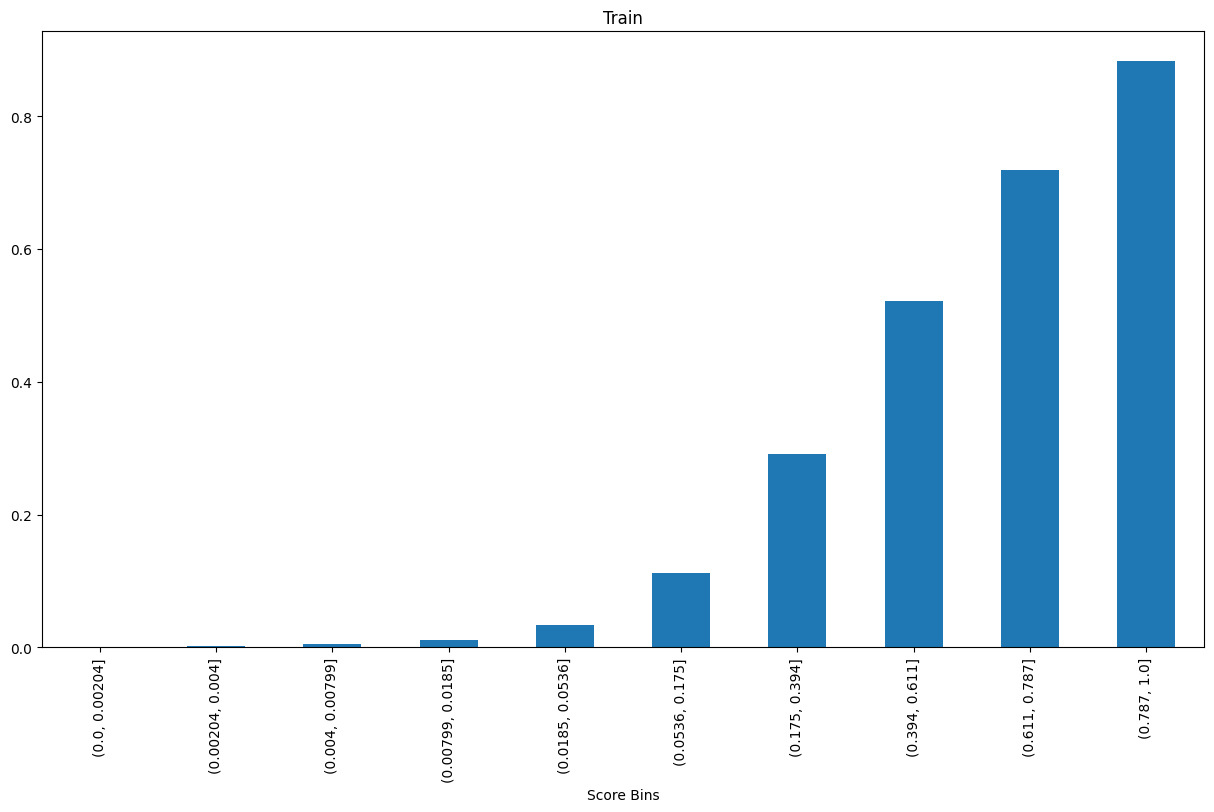

In [ ]:
stat.loc[:, 'Bad Rate'].plot(kind = 'bar', figsize=(15, 8), title = 'Train')

<Axes: title={'center': 'Test1'}, xlabel='Score Bins'>

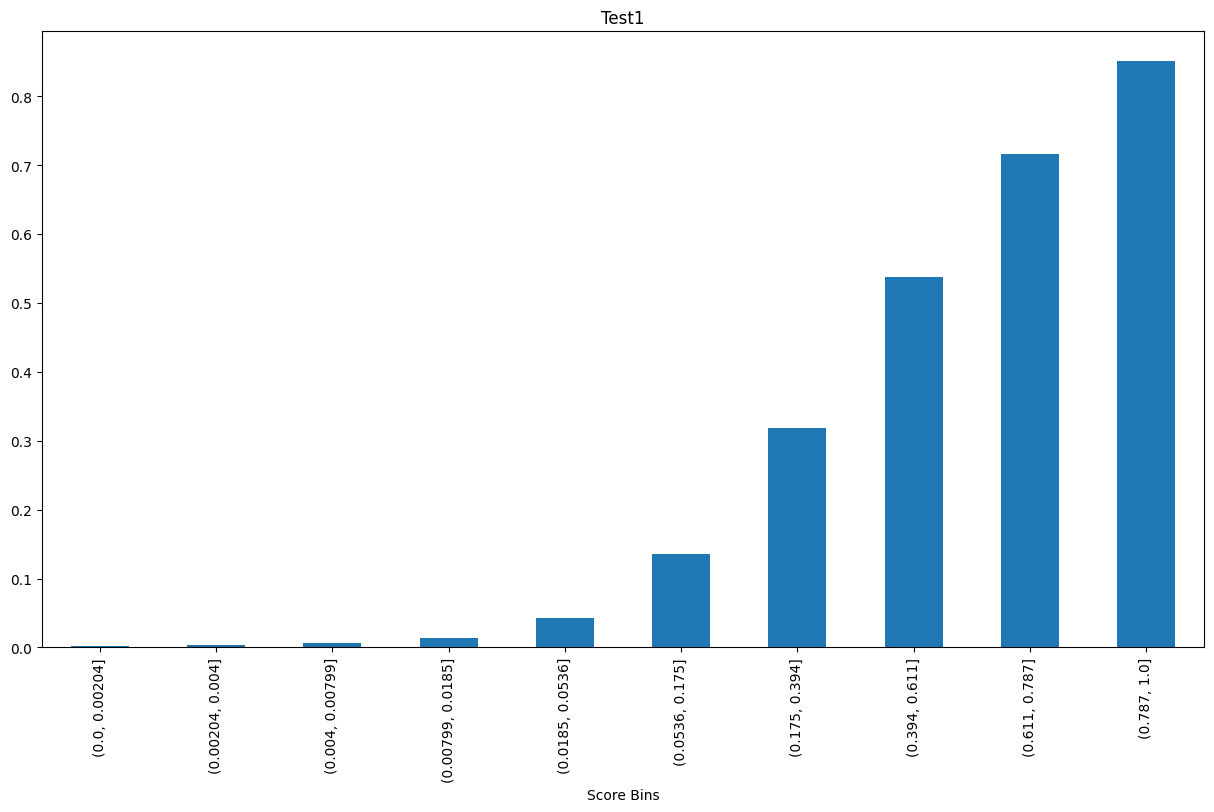

In [ ]:
perf_test_data = pd.DataFrame({"Actual": ytest1['target'], "Prediction": ytest1_pred[:,0]})

perf_test_data["Score Bins"] = pd.cut(perf_test_data["Prediction"], quantiles)
stat1 = perf_test_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat1["Bad Rate"] = stat1["sum"] / stat1["count"]
stat1.loc[:, 'Bad Rate'].plot(kind = 'bar', figsize=(15, 8), title = 'Test1')

<Axes: title={'center': 'Test2'}, xlabel='Score Bins'>

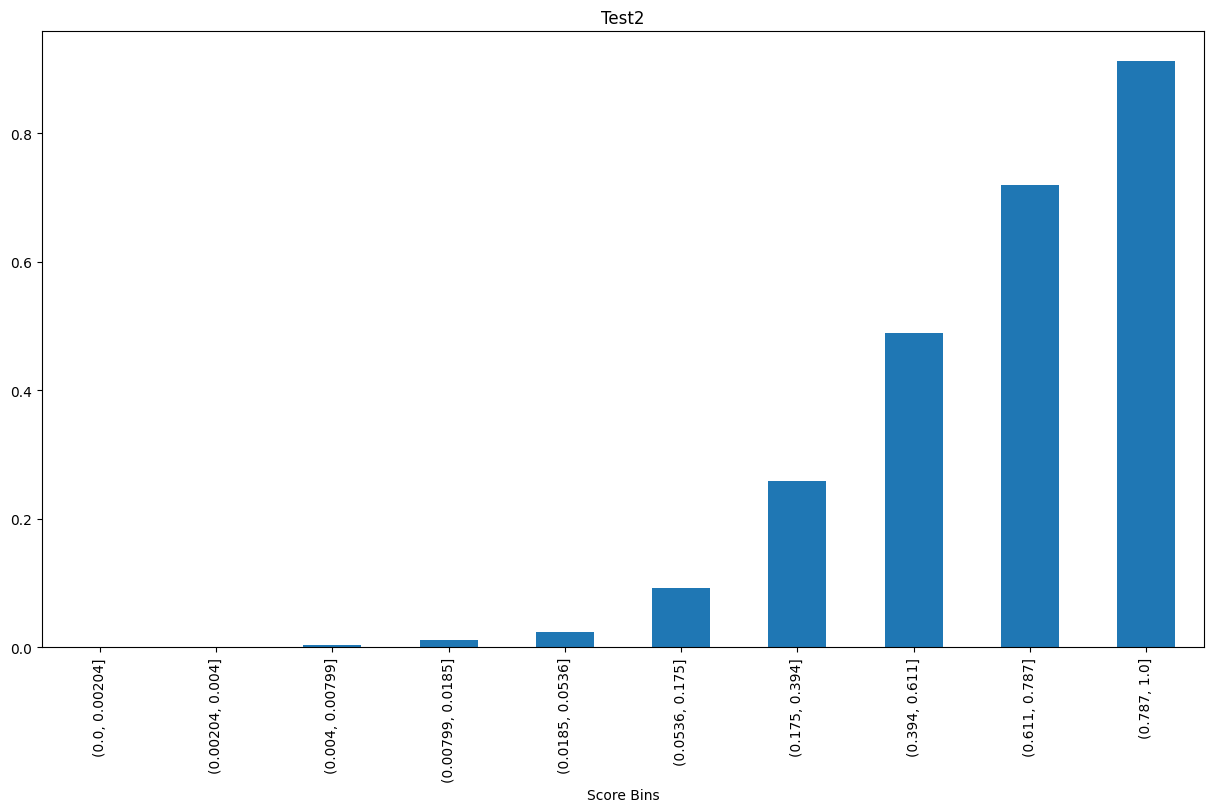

In [ ]:
perf_test_data1 = pd.DataFrame({"Actual": ytest2['target'], "Prediction": ytest2_pred[:,0]})

perf_test_data1["Score Bins"] = pd.cut(perf_test_data1["Prediction"], quantiles)
stat2 = perf_test_data1.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat2["Bad Rate"] = stat2["sum"] / stat2["count"]
stat2.loc[:, 'Bad Rate'].plot(kind = 'bar', figsize=(15, 8), title = 'Test2')

In [ ]:
xtest2 = pd.read_csv('xtest2.csv')
ytest2 = pd.read_csv('ytest2.csv')

In [ ]:
for i in xtest2.columns:
  if ('B_' in i ) or ('S_' in i ):
    print(i)

S_3
B_17
B_39
B_1
B_3
B_2
B_9
B_5
B_38
S_23
B_7
B_4
B_10
B_8
S_7


## Strategy for calculating - Default Rate and Revenue

In [ ]:
def strategy(x, actual, pred, threshold, balance = 'B_2', spend = 'S_3'):
  ydf = pd.DataFrame({'actual': actual, 'pred': pred})
  df = pd.concat([x, ydf], axis = 1)
  total = df.loc[df['pred'] < threshold].shape[0]
  default = df.loc[df['pred'] < threshold, 'actual'].mean()

  df['revenue'] = df.apply(lambda x: x[balance]*0.02 + x[spend]*.001 if x['actual'] != 1 else 0, axis = 1)

  revenue = df.loc[df['pred'] < threshold, 'revenue'].sum()

  return [total, default, revenue]


In [ ]:
strategy(xtrain, ytrain['target'], y_pred[:,0], 0.55, balance = 'B_2', spend = 'S_3')

[208039, 0.10498992977278299, 2390.8141167246567]

In [ ]:
strategy(xtrain, ytrain['target'], y_pred[:,0], 0.35, balance = 'B_2', spend = 'S_3')

[182839, 0.056114942654466496, 2292.8212212545823]

In [ ]:
strategy(xtest1, ytest1['target'], ytest1_pred[:,0], 0.55, balance = 'B_2', spend = 'S_3')

[24743, 0.11085963706907004, 280.1134215132236]

In [ ]:
threshold = np.linspace(0, 1, 100)

In [ ]:
threshold[1]

0.010101010101010102

In [ ]:
threshold[1]

0.010101010101010102

In [ ]:
r = np.array([])
r = np.append([r],[2])
np.append([r],[2])

array([2., 2.])

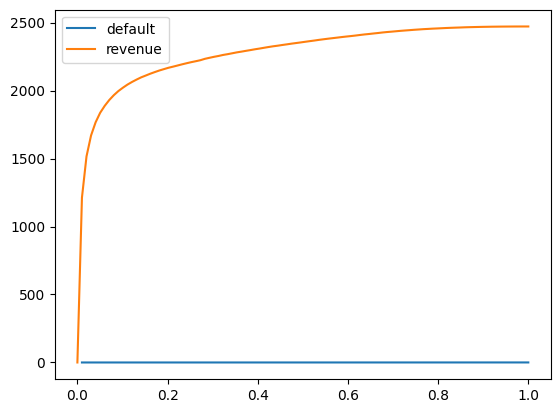

In [ ]:
#

import matplotlib.pyplot as plt

threshold = np.linspace(0, 1, 100)
default = np.array([])
revenue = np.array([])

for i in range(100) :
    lis = strategy(xtrain, ytrain['target'], y_pred[:,0], threshold[i], balance = 'B_2', spend = 'S_3')
    default = np.append(default, lis[0])
    revenue = np.append(revenue, lis[1])

fig, ax = plt.subplots()

ax.plot(threshold, default, label = 'default')

ax.plot(threshold, revenue, label = 'revenue')

# Add a legend
ax.legend()

# Show the plot
plt.show()


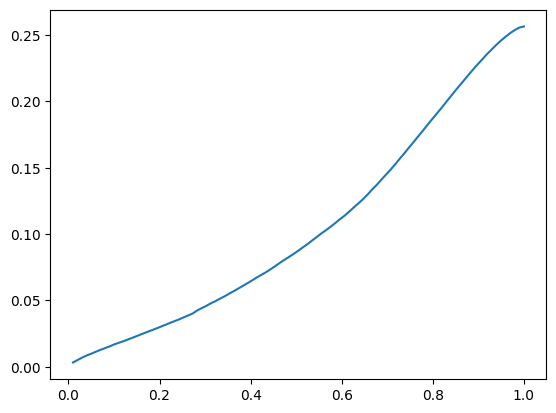

In [ ]:
plt.plot(threshold, default, label = 'default')
plt.show()

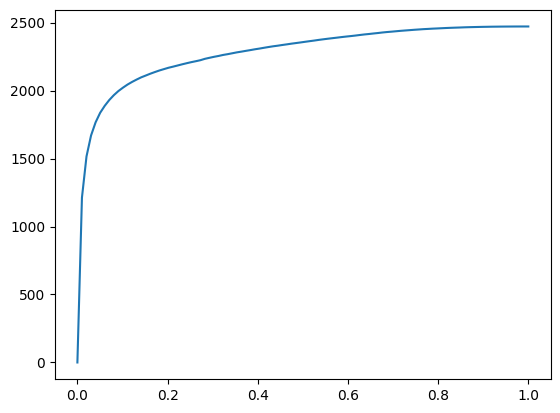

In [ ]:
plt.plot(threshold, revenue, label = 'default')
plt.show()

## Executive Summary

In [ ]:
# Conservative Strategy - Threshold = 0.55
# Aggressive Strategy - Threshold = 0.4



def ex_sum(xdf, actual, pred, c, a, balance = 'B_2', spend = 'S_3'):
    summary = pd.DataFrame(columns = ['#Total', 'Default Rate', 'Revenue'], index = ['Conservative', 'Aggressive'])
    summary.loc['Conservative', :] = strategy(xdf, actual, pred, c, balance = 'B_2', spend = 'S_3')
    summary.loc['Aggressive', :] = strategy(xdf, actual, pred, a, balance = 'B_2', spend = 'S_3')
    return summary




In [ ]:
ex_sum(xtrain, ytrain['target'], y_pred[:,0], 0.5, 0.4, balance = 'B_2', spend = 'S_3')

,#Total,Default Rate,Revenue
Conservative,201383,0.090862,2370.260123
Aggressive,188797,0.066103,2320.595564


In [ ]:
ex_sum(xtest1, ytest1['target'], ytest1_pred[:,0], 0.5, 0.4, balance = 'B_2', spend = 'S_3')

,#Total,Default Rate,Revenue
Conservative,23928,0.096498,277.573557
Aggressive,22475,0.072036,272.171131


In [ ]:
ex_sum(xtest2, ytest2['target'], ytest2_pred[:,0], 0.5, 0.4, balance = 'B_2', spend = 'S_3')

,#Total,Default Rate,Revenue
Conservative,63354,0.083641,740.679005
Aggressive,59051,0.059017,721.551229


In [ ]:
print(xtest2.shape)
print(xtest1.shape)




(88750, 44)
(30730, 44)


In [ ]:
print(ytest1_pred )

[[0.00281386]
 [0.00556373]
 [0.04376058]
 ...
 [0.39005342]
 [0.07992009]
 [0.9369414 ]]


In [ ]:
ytrain.shape

(269243, 1)

In [ ]:
yhat = np.concatenate((ytest1_pred , ytrain), axis = 0)
yhat.shape

(299973, 1)

In [ ]:
x = pd.concat([xtest1, xtrain, xtest2], axis = 0)
y = pd.concat([ytest1, ytrain, ytest2], axis = 0)
yhat = np.concatenate((ytest1_pred , y_pred, ytest2_pred), axis = 0)


ex_sum(x, y['target'], yhat[:,0], 0.5, 0.4, balance = 'B_2', spend = 'S_3')

,#Total,Default Rate,Revenue
Conservative,288665,0.089744,3388.512685
Aggressive,270323,0.065048,3314.317924


In [ ]:
roc_auc_score(ytest1, ytest1_pred[:,0])

0.9212237935088915

In [ ]:
ytest1.mean()

target    0.233355
dtype: float64

In [ ]:
ytest2.mean()

target    0.278287
dtype: float64

In [ ]:
ytrain.mean()

target    0.256378
dtype: float64

In [ ]:
while 2 != 0:
    i +=1

KeyboardInterrupt: ignored

In [ ]:
i

NameError: ignored